# Question 1 - 10

- [Q.1 チャネル入れ替え](#q1)
- [Q.2 グレイスケール](#q2)
- [Q.3 二値化](#q3)
- [Q.4 大津の二値化](#q4)
- [Q.5 HSV変化](#q5)
- [Q.6 減色処理](#q6)
- [Q.7 平均プーリング](#q7)
- [Q.8 最大プーリング](#q8)
- [Q.9 ガウシアンフィルタ](#q9)
- [Q.10 メディアンフィルタ](#q10)

In [1]:
from skimage import io
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_orig = io.imread("../dataset/images/imori_256x256.png")

In [11]:
def show_image(*images, **kwargs_imshow):
    num_images = len(images)

    fig, ax = plt.subplots(1, num_images)

    if num_images == 1:
        ax.imshow(images[0], **kwargs_imshow)
        return ax

    for i, img in enumerate(images):
        ax[i].imshow(img, **kwargs_imshow)

    plt.tight_layout()
    return fig

### <a id="q1">Q.1 チャネル入れ替え</a>

画像を読み込み、RGBをBGRの順に入れ替えよ。

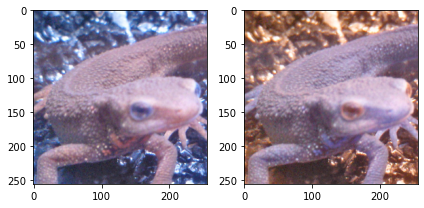

In [3]:
img_01 = img_orig.copy()

img_01 = img_01[:, :, ::-1]

show_image(img_orig, img_01)
plt.show()

### <a id="q2">Q.2 グレースケール Grayscale</a>

画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Grayscale = 0.2126 R + 0.7152 G + 0.0722 B

それぞれの係数は人間の視覚の敏感さであり、Gに人間の最も強く反応し、Bにはあまり反応しないことを示す。

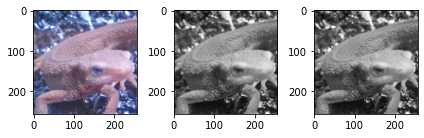

In [13]:
img_02 = img_orig.copy()

img_02_cv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

def rgb2gray(img):
    img = img.copy().astype(np.float32)
    rgb_weights = [0.2126, 0.7152, 0.0722]
    img_out = np.average(img, axis=2, weights=rgb_weights)
    img_out = np.clip(img_out, 0, 255).astype(np.uint8)
    return img_out
img_02_my = rgb2gray(img_orig)

show_image(img_orig, img_02_cv, img_02_my, cmap="gray")
plt.show()